## Quiz 4-1

answer:

AD_inv: [[0.         0.33333333 0.         0.        ]

        
$p_0(\infty)$ = 0.125

$p_1(\infty)$ = 0.375

$p_2(\infty)$ = 0.25

$p_3(\infty)$ = 0.25


In [7]:

import numpy as np
A = np.matrix([[0, 1, 0, 0], [1, 0, 1, 1], [0, 1, 0, 1], [0, 1, 1, 0]], dtype=float)
print(A)
D = np.diag(np.sum(np.array(A), axis=0))
print(D)
D_inv = np.diag(1 / np.sum(np.array(A), axis=0))
print(D_inv)

[[0. 1. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]]
[[1. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 2.]]
[[1.         0.         0.         0.        ]
 [0.         0.33333333 0.         0.        ]
 [0.         0.         0.5        0.        ]
 [0.         0.         0.         0.5       ]]


Because the initial start vertex didn't affect the result, so here I suppose the walker start at vertex 1.

In [24]:
import pdb
class Random_walk():
    def __init__(self):
        self.A = np.matrix([[0, 1, 0, 0], [1, 0, 1, 1], [0, 1, 0, 1], [0, 1, 1, 0]], dtype=float)
        D = np.diag(np.sum(np.array(A), axis=0))
        self.D_inv = np.diag(1 / np.sum(np.array(A), axis=0))
       
    def compute_ad(self):
        
        return np.dot(self.A, self.D_inv)

    def next_prob(self, AD_inv, p):
        return np.dot(AD_inv, p)

    def compute_prob(self, t, p_init):
        p = p_init
        AD_inv = self.compute_ad()
        print(f'AD_inv: {AD_inv}')
        for i in range(t):
            p = self.next_prob(AD_inv, p)
        return p

walker = Random_walk()
walker.compute_prob(2, np.matrix([1,0,0,0]).T)

AD_inv: [[0.         0.33333333 0.         0.        ]
 [1.         0.         0.5        0.5       ]
 [0.         0.33333333 0.         0.5       ]
 [0.         0.33333333 0.5        0.        ]]


matrix([[0.33333333],
        [0.        ],
        [0.33333333],
        [0.33333333]])

In [22]:
walker = Random_walk()
walker.compute_prob(59, np.matrix([1,0,0,0]).T)

matrix([[0.125     ],
        [0.37500001],
        [0.25      ],
        [0.25      ]])

In [23]:
walker = Random_walk()
walker.compute_prob(60, np.matrix([1,0,0,0]).T)

matrix([[0.125],
        [0.375],
        [0.25 ],
        [0.25 ]])

walker = Random_walk()
walker.compute_prob(100, np.matrix([1,0,0,0]).T)

In [13]:
walker = Random_walk()
walker.compute_prob(10000, np.matrix([1,0,0,0]).T)

matrix([[0.125],
        [0.375],
        [0.25 ],
        [0.25 ]])

We can easily see that the probability is becoming stable, which means the time increrasing will not hurt the probability.

## Quiz 4-2

answer: 2

/Users/Alchemist/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


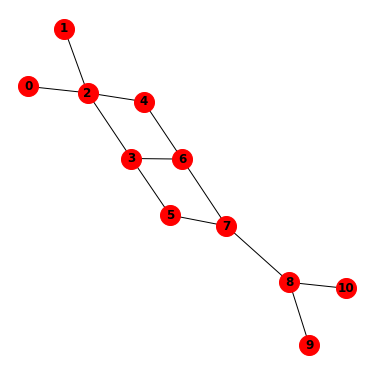

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.Graph()
G.add_nodes_from(range(0,10))
G.add_edges_from([(0,2),(1,2),(2,3),(2,4),(3,5),(3,6),(4,6),(5,7),(6,7),(7,8),(8,9),(8,10)])
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
A = nx.adjacency_matrix(G).todense()
A = np.array(A, dtype = np.float64)
c = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # counter

In [43]:
A.shape, c.shape
len(A)
A[2], np.argwhere(A[2]==1).reshape(-1)

(array([1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.]), array([0, 1, 3, 4]))

In [67]:
import random

def random_walk(times):
#     randomly select an initial vertex
    now = random.randint(0, 10)
    c[now] += 1
    
    for i in range(times):
        option = np.argwhere(A[now]==1).reshape(-1)
        next_v = random.choice(option)
        
        c[next_v] += 1
        now = next_v
        
    return c.argmax()

In [68]:
node = random_walk(1000)
print(f'Most visited node: {node}')

Most visited node: 2
